Load necessary modules

In [1]:
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise

Generate training data

In [2]:
N=31

X_train = np.zeros((N*N,2))
X_1, X_2 = np.meshgrid(np.linspace(-4,4,N),np.linspace(-4,4,N))
X_train[:,0] = X_1.flatten()
X_train[:,1] = X_2.flatten()
y_train = np.zeros(N*N)
y_train = y_train.reshape(-1,1)

def f(x, y):
     return (np.sin(np.sqrt((0.5*x) ** 2 + (0.5*y) ** (4))))

y_train =  f(X_train[:,0],X_train[:,1])
y_train = y_train.reshape(-1,1)

Train kernel-based model

In [3]:
phi_X_train = pairwise.rbf_kernel(X_train, X_train,gamma=0.15)
print('# of inputs/features: ', phi_X_train.shape[1])

lin = LinearRegression()
lin.fit(phi_X_train, y_train)

# of inputs/features:  961


LinearRegression()

Evaluate model

In [4]:
N_eval = 500
x_1 = np.linspace(-4,4,N_eval)
x_2 = np.linspace(-4,4,N_eval)
X_1, X_2 = np.meshgrid(x_1,x_2)
X_eval = np.zeros((N_eval**2,2))
X_eval[:,0] = X_1.flatten()
X_eval[:,1] = X_2.flatten()
phi_X_eval = pairwise.rbf_kernel(X_eval, X_train,gamma=0.15)

Y_eval = lin.predict(phi_X_eval)

Plot training data and model

<IPython.core.display.Javascript object>


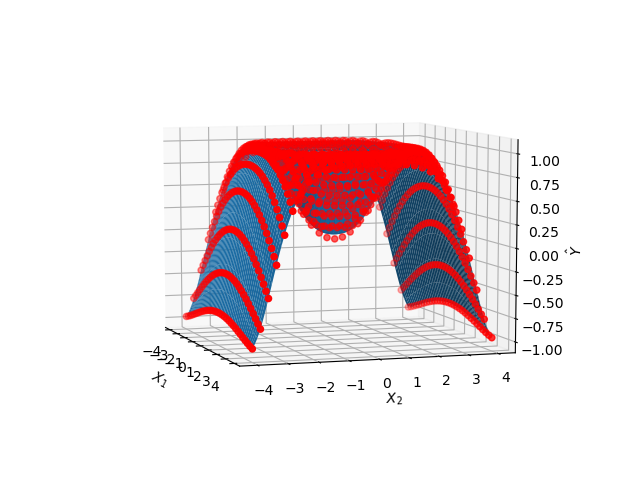

In [5]:
pos = np.empty(X_1.shape + (2,))
pos[:, :, 0] = X_1; pos[:, :, 1] = X_2
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1],y_train[:],c='red', label="training set")
ax.plot_surface(X_1,X_2,Y_eval.reshape(N_eval,N_eval), label="regression predictor")
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel("$\hat{Y}$")
ax.view_init(elev=8., azim=-18)
plt.show()

Evaluate model also outside training data

In [6]:
N_eval = 150
x_1 = np.linspace(-4.2,4.2,N_eval)
x_2 = np.linspace(-4.2,4.2,N_eval)
X_1, X_2 = np.meshgrid(x_1,x_2)
X_eval = np.zeros((N_eval**2,2))
X_eval[:,0] = X_1.flatten()
X_eval[:,1] = X_2.flatten()
phi_X_eval = pairwise.rbf_kernel(X_eval, X_train,gamma=0.15)

Y_eval = lin.predict(phi_X_eval)

Plot training data and model

<IPython.core.display.Javascript object>


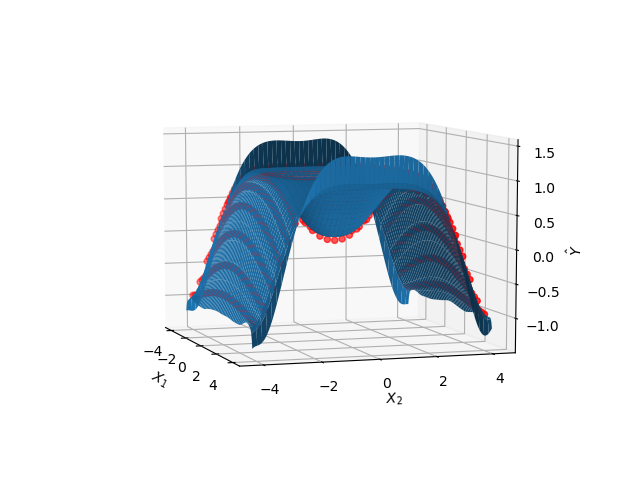

In [7]:
pos = np.empty(X_1.shape + (2,))
pos[:, :, 0] = X_1; pos[:, :, 1] = X_2
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1],y_train[:],c='red', label="training set")
ax.plot_surface(X_1,X_2,Y_eval.reshape(N_eval,N_eval), label="regression predictor")
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel("$\hat{Y}$")
ax.view_init(elev=8., azim=-18)
plt.show()